In [270]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
#Turning interactive plotting off, specifically write plt.show() for seen the figure
plt.ioff()

In [295]:
#Reading the data previously processed
data2 = pd.read_csv('Data/cleaned2_air_system_previous_years.csv',sep=',')

In [272]:
#Overviewing the data
data2.iloc[:,1:].describe()

,ac_000,ad_000,ag_004,ag_006,ah_000,av_000,ax_000,ay_006,ay_008,az_000,...,cs_007,cu_000,cv_000,db_000,de_000,do_000,du_000,eb_000,ee_006,ee_008
count,2.458600e+04,24586.000000,2.458600e+04,2.458600e+04,2.458600e+04,24586.000000,24586.000000,2.458600e+04,2.458600e+04,2.458600e+04,...,2.458600e+04,24586.000000,2.458600e+04,24586.000000,24586.000000,24586.000000,2.458600e+04,2.458600e+04,2.458600e+04,2.458600e+04
mean,4.887822e+08,722.594159,3.715124e+05,1.972659e+06,2.098150e+06,1957.939071,663.244855,1.382552e+06,1.115347e+06,5.963517e+03,...,2.291664e+04,1657.813959,3.010672e+06,18.075734,573.762873,42434.604328,5.534145e+06,1.258094e+07,3.865763e+05,1.843840e+05
std,8.958653e+08,4304.328982,2.071916e+06,1.837924e+06,2.832987e+06,5887.181101,1668.937197,1.731818e+06,2.820067e+06,4.307926e+04,...,1.185714e+05,6294.662898,3.126209e+06,74.273409,1865.386116,40797.111231,1.062840e+07,4.312029e+07,7.426033e+05,2.717931e+05
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.270000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+02,166.000000,8.740000e+02,1.239780e+06,1.117441e+06,302.000000,124.000000,4.951740e+05,1.001310e+05,1.986500e+03,...,9.847500e+03,322.000000,1.786902e+06,0.000000,162.000000,21566.000000,1.260300e+05,4.136225e+05,1.502725e+05,1.076450e+04
50%,6.280000e+02,360.000000,7.625000e+03,1.688895e+06,1.350824e+06,684.000000,264.000000,1.109206e+06,3.952670e+05,2.946000e+03,...,1.664800e+04,682.000000,2.276142e+06,10.000000,262.000000,34190.000000,9.620600e+05,1.891100e+06,2.338350e+05,1.033430e+05
75%,3.471000e+03,746.000000,8.330800e+04,2.303407e+06,2.025398e+06,1784.000000,584.000000,1.813956e+06,1.071624e+06,4.669500e+03,...,2.688550e+04,1442.000000,3.211840e+06,28.000000,462.000000,50202.000000,7.291900e+06,9.853978e+06,3.795210e+05,2.556645e+05
max,2.130707e+09,612266.000000,2.288306e+08,7.763627e+07,4.348318e+07,264378.000000,50544.000000,8.703840e+07,8.491987e+07,3.926210e+06,...,1.288422e+07,388920.000000,8.161051e+07,9636.000000,79988.000000,846110.000000,1.873697e+08,1.322457e+09,2.811407e+07,8.291710e+06


In [273]:
#Another overview
data2.head()

,class,ac_000,ad_000,ag_004,ag_006,ah_000,av_000,ax_000,ay_006,ay_008,...,cs_007,cu_000,cv_000,db_000,de_000,do_000,du_000,eb_000,ee_006,ee_008
0,neg,2.130706e+09,280.0,37250.0,3664156.0,2551696.0,1012.0,268.0,4239660.0,755876.0,...,26330.0,734.0,4122704.0,18.0,1126.0,85908.0,14745580.0,2801180.0,339156.0,73224.0
2,neg,2.280000e+02,100.0,1648.0,1883374.0,1234132.0,358.0,110.0,870456.0,1450312.0,...,16682.0,292.0,2180528.0,0.0,152.0,38182.0,300240.0,1040120.0,320746.0,95128.0
4,neg,1.368000e+03,458.0,43752.0,1800340.0,1974038.0,1788.0,642.0,2128914.0,584074.0,...,22228.0,1664.0,3440288.0,0.0,444.0,62648.0,457040.0,21173050.0,286954.0,433954.0
5,neg,2.130706e+09,218.0,9128.0,1462836.0,1087760.0,1142.0,452.0,1160742.0,447274.0,...,15672.0,1318.0,2028182.0,12.0,44.0,73432.0,10244700.0,0.0,1534.0,856.0
7,neg,2.130706e+09,116.0,2130.0,4227340.0,2738458.0,182.0,34.0,1558518.0,517638.0,...,37752.0,110.0,5479566.0,12.0,362.0,167572.0,14438160.0,3537310.0,1108672.0,129504.0


In [274]:
#Taking under a quantile (99,99%). This way we can automatize the dropping of outlyers conserving most of the original pre-processed data
quantiles = data2.iloc[:,1:].quantile(0.9999)
data2_under_quantile = data2.copy()

for column in data2.columns[1:]:
    data2_under_quantile[column] = data2_under_quantile[column][data2_under_quantile[column] <= quantiles[column]]

data2_under_quantile['class'] = data2['class']

counter = 0
for column in data2_under_quantile.columns:
    if any(data2_under_quantile[column].isna()):
        counter+=1
#This print show how many colums have at least one NaN value
print(counter)

data2_under_quantile = data2_under_quantile.dropna()

39


In [275]:
#Verifying proportion of neg vs pos
pos_quantity = sum(data2_under_quantile["class"]=="pos")
neg_quantity = sum(data2_under_quantile["class"]=="neg")
print(pos_quantity/neg_quantity*100)

0.7601594280313926


In [276]:
#Searching for outliers
#Here there are compared the data before and after the process of automatically taking out the outliers
for column in data2.iloc[:,1:].columns:
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,1)
    plt.hist(data2[column])
    plt.subplot(2,2,3)
    plt.plot(data2[column])
    plt.subplot(2,2,2)
    plt.hist(data2_under_quantile[column])
    plt.subplot(2,2,4)
    plt.plot(data2_under_quantile[column])
    plt.savefig("Assets/figures/"+column+'.jpg')
    plt.close()

In [277]:
#From now on it's going to be shown how select som columns from the already selected ones.
#Till now it has been only a cleaning process. The following part will reduce dimensionalitty even further
#Using Tree classifier significance meassure tool 
# Encoding class
encoder=LabelEncoder()
class_encoded = encoder.fit_transform(data2_under_quantile["class"])
X_train, X_test, y_train, y_test = train_test_split(data2_under_quantile.iloc[:,1:], class_encoded, test_size=0.30, random_state=0)

In [278]:
#Using the algorithm for selecting the importance of attributes
forest = ExtraTreesClassifier()
forest.fit(X_train,y_train)
significance = forest.feature_importances_
significance


array([0.01619951, 0.01901993, 0.04262181, 0.02045759, 0.08363049,
       0.03187406, 0.01647277, 0.01987171, 0.03805629, 0.0243531 ,
       0.02777835, 0.0241497 , 0.0166382 , 0.01703852, 0.01716214,
       0.02067939, 0.03098623, 0.02257545, 0.02371536, 0.0145045 ,
       0.04456723, 0.03302672, 0.0149571 , 0.02705986, 0.        ,
       0.01729308, 0.02691883, 0.02734002, 0.01811309, 0.04106669,
       0.01915756, 0.02018306, 0.01484408, 0.03340871, 0.0028753 ,
       0.03270802, 0.02615484, 0.01652564, 0.02252563, 0.01933487,
       0.01415457])

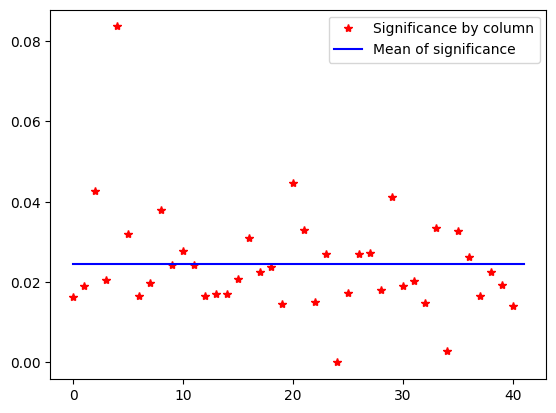

In [279]:
#Analyzing which ones are more significant
plt.plot(significance,'*r')
plt.plot([0,len(significance)],[np.mean(significance),np.mean(significance)],'-b')
plt.legend(["Significance by column","Mean of significance"])
plt.show()

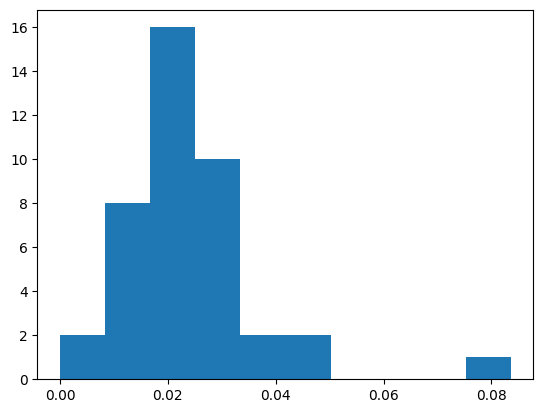

In [280]:
#Here is the histogram of the significances
plt.hist(significance)
plt.show()

In [281]:
#Taking the mean value of all significances it let a lower number of columns
sum(significance>=np.mean(significance))

15

In [282]:
#Using the rule created and rearranging the columns
filterForColumns = pd.DataFrame({
    "columns":data2_under_quantile.iloc[:,1:].columns,
    "significance":significance
})

filteredColumns = filterForColumns[filterForColumns["significance"]>=np.mean(significance)]["columns"].values
filteredColumns

array(['ag_004', 'ah_000', 'av_000', 'ay_008', 'az_001', 'ba_008',
       'bk_000', 'bs_000', 'ca_000', 'cg_000', 'cm_000', 'cs_004',
       'cv_000', 'de_000', 'do_000'], dtype=object)

In [283]:
#Rearranging and saving into a file the reultant data Frame
data2_under_quantile2 = pd.DataFrame()
data2_under_quantile2 = pd.concat([data2_under_quantile["class"],data2_under_quantile[filteredColumns]],axis=1)
data2_under_quantile2.to_csv('Data/significance_filtered_air_system_previous_years.csv',index_label=False,sep=',')
#Here ends the dimensionality reduction using tree classifiers

In [284]:
#Verifying proportion of neg vs pos
pos_quantity = sum(data2_under_quantile2["class"]=="pos")
neg_quantity = sum(data2_under_quantile2["class"]=="neg")
print(pos_quantity/neg_quantity*100)

0.7601594280313926


In [285]:
# From this point it's going to be a dimensionality reduction using Low Variance Filter
# Here, the data is normalized for been compared 
normalized_data = pd.DataFrame(normalize(data2_under_quantile.iloc[:,1:]),columns=data2_under_quantile.iloc[:,1:].columns)
normalized_data

,ac_000,ad_000,ag_004,ag_006,ah_000,av_000,ax_000,ay_006,ay_008,az_000,...,cs_007,cu_000,cv_000,db_000,de_000,do_000,du_000,eb_000,ee_006,ee_008
0,0.999969,1.314077e-07,1.748192e-05,0.001720,0.001198,4.749450e-07,1.257759e-07,0.001990,0.000355,2.522089e-06,...,0.000012,3.444759e-07,0.001935,8.447638e-09,5.284467e-07,0.000040,0.006920,0.001315,1.591704e-04,3.436499e-05
1,0.000052,2.294568e-05,3.781448e-04,0.432153,0.283180,8.214554e-05,2.524025e-05,0.199732,0.332784,3.717200e-04,...,0.003828,6.700139e-05,0.500337,0.000000e+00,3.487744e-05,0.008761,0.068892,0.238663,7.359736e-02,2.182777e-02
2,0.000063,2.099727e-05,2.005835e-03,0.082538,0.090501,8.197187e-05,2.943285e-05,0.097601,0.026777,7.537011e-05,...,0.001019,7.628702e-05,0.157722,0.000000e+00,2.035543e-05,0.002872,0.020953,0.970690,1.315557e-02,1.989487e-02
3,0.999987,1.023122e-07,4.283971e-06,0.000687,0.000511,5.359656e-07,2.121335e-07,0.000545,0.000210,7.415286e-07,...,0.000007,6.185663e-07,0.000952,5.631863e-09,2.065016e-08,0.000034,0.004808,0.000000,7.199398e-07,4.017396e-07
4,0.999969,5.444033e-08,9.996372e-07,0.001984,0.001285,8.541501e-08,1.595665e-08,0.000731,0.000243,3.113424e-06,...,0.000018,5.162445e-08,0.002572,5.631759e-09,1.698914e-07,0.000079,0.006776,0.001660,5.203144e-04,6.077794e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24517,0.999954,7.321182e-08,2.911578e-05,0.001153,0.000972,1.764593e-07,3.848314e-08,0.000889,0.000080,1.231460e-06,...,0.000013,1.154494e-07,0.001984,0.000000e+00,1.558098e-07,0.000063,0.009010,0.001127,3.166064e-04,1.541203e-06
24518,0.000120,9.905085e-05,9.438964e-04,0.250277,0.328033,1.107039e-04,1.255350e-04,0.445368,0.077567,3.432350e-04,...,0.003153,3.570068e-04,0.404694,0.000000e+00,4.502312e-05,0.011378,0.334342,0.188435,6.624013e-02,6.221983e-02
24519,0.000008,2.303117e-06,7.317968e-04,0.074492,0.060430,4.120845e-05,1.337294e-05,0.031368,0.058271,9.435349e-05,...,0.000451,9.187702e-06,0.021805,0.000000e+00,1.981176e-05,0.001697,0.005830,0.992139,1.262712e-02,1.112730e-02
24520,0.999749,2.317899e-07,1.548394e-07,0.001525,0.001236,9.966028e-07,5.114393e-07,0.002086,0.000000,2.589103e-06,...,0.000008,2.107693e-06,0.001032,1.032263e-08,1.332557e-07,0.000017,0.011839,0.018713,9.123326e-05,3.764381e-04


In [286]:
# The variance of each column is calculated and a vector is returned
variance = normalized_data.var()

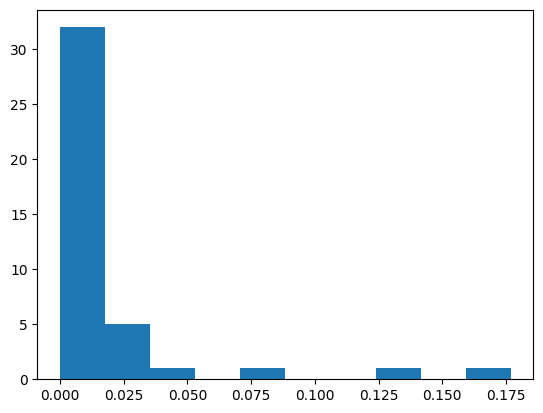

In [287]:
# Showing an histogram of the variance obtained
plt.hist(variance)
plt.show()

In [288]:
# Another overview to the variance using describe()
variance.describe()    

count    4.100000e+01
mean     1.469784e-02
std      3.665131e-02
min      3.997361e-11
25%      7.138818e-08
50%      1.079227e-04
75%      5.664039e-03
max      1.768936e-01
dtype: float64

In [289]:
# In this case is going to be used the 3 quantil to select the variables that carries more information
sum(variance>=5.664039e-03)

11

In [290]:
# As in the previous filtering process, here the columns are filtered
filterForColumns = pd.DataFrame({
    "columns":data2_under_quantile.iloc[:,1:].columns,
    "variance":variance
})
filteredColumns = filterForColumns[filterForColumns["variance"]>=5.664039e-03]["columns"].values
filteredColumns

array(['ac_000', 'ag_006', 'ah_000', 'ay_006', 'ay_008', 'az_004',
       'cd_000', 'cs_006', 'cv_000', 'du_000', 'eb_000'], dtype=object)

In [291]:
# And the saved for the machine learning process
data2_under_quantile2 = pd.DataFrame()
data2_under_quantile2 = pd.concat([data2_under_quantile["class"],data2_under_quantile[filteredColumns]],axis=1)
data2_under_quantile2.to_csv("Data/var_filtered_air_system_previous_years.csv",index_label=False,sep=',')
data2_under_quantile2

,class,ac_000,ag_006,ah_000,ay_006,ay_008,az_004,cd_000,cs_006,cv_000,du_000,eb_000
0,neg,2.130706e+09,3664156.0,2551696.0,4239660.0,755876.0,615248.0,1209600.0,895240.0,4122704.0,14745580.0,2801180.0
2,neg,2.280000e+02,1883374.0,1234132.0,870456.0,1450312.0,1811606.0,1209600.0,488302.0,2180528.0,300240.0,1040120.0
4,neg,1.368000e+03,1800340.0,1974038.0,2128914.0,584074.0,30194.0,1209600.0,1137268.0,3440288.0,457040.0,21173050.0
5,neg,2.130706e+09,1462836.0,1087760.0,1160742.0,447274.0,42450.0,1209600.0,443538.0,2028182.0,10244700.0,0.0
7,neg,2.130706e+09,4227340.0,2738458.0,1558518.0,517638.0,427644.0,1209600.0,1138924.0,5479566.0,14438160.0,3537310.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,2.130706e+09,2456958.0,2070562.0,1893318.0,170696.0,2121224.0,1209600.0,756266.0,4226942.0,19199000.0,2401220.0
59991,neg,4.520000e+02,945004.0,1238598.0,1681636.0,292880.0,1465362.0,1209600.0,834160.0,1528060.0,1262420.0,711500.0
59995,neg,6.640000e+02,6015982.0,4880368.0,2533260.0,4705948.0,60160.0,1209600.0,2230222.0,1760956.0,470800.0,80125300.0
59998,neg,2.130706e+09,3251010.0,2634394.0,4445146.0,0.0,940376.0,1209600.0,1312814.0,2200048.0,25232340.0,39881280.0


In [292]:
#Verifying proportion of neg vs pos
pos_quantity = sum(data2_under_quantile2["class"]=="pos")
neg_quantity = sum(data2_under_quantile2["class"]=="neg")
print(pos_quantity/neg_quantity*100)

0.7601594280313926


In [293]:
print(pos_quantity)
print(neg_quantity)

185
24337
